<a href="https://colab.research.google.com/github/txc-000/machine-learning/blob/main/05a_doggy_door.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.applications import VGG16

# load the VGG16 network *pre-trained* on the ImageNet dataset
model = VGG16(weights="imagenet")

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [2]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

In [13]:
import os

folder_path = 'data/doggy_door_images'

# Buat folder kalau belum ada
os.makedirs(folder_path, exist_ok=True)
print(f"Folder '{folder_path}' sudah dibuat atau sudah ada.")


Folder 'data/doggy_door_images' sudah dibuat atau sudah ada.


In [14]:
from google.colab import files
uploaded = files.upload()


Saving download.jpeg to download.jpeg


In [20]:
import os
print(os.listdir('data/doggy_door_images'))


['download.jpeg']


(183, 275, 3)


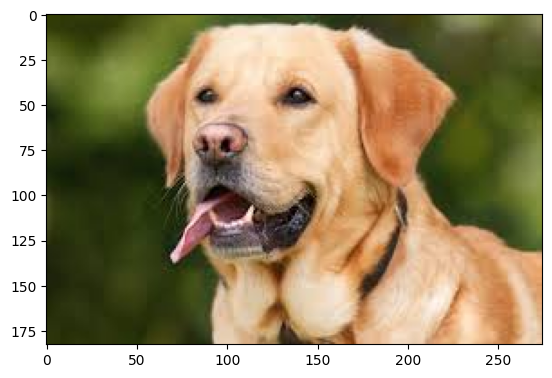

In [21]:
show_image('data/doggy_door_images/download.jpeg')


In [22]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(image_path).shape)

    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    # Print image's shape after processing
    print('Processed image shape: ', image.shape)
    return image

In [24]:
from tensorflow.keras.preprocessing import image as image_utils
import numpy as np

def load_and_process_image(image_path):
    # Load image, ubah ke grayscale dan resize ke 28x28
    img = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28, 28))
    img_array = image_utils.img_to_array(img)
    img_array = img_array.reshape(1, 28, 28, 1)
    img_array = img_array / 255.0  # normalisasi pixel ke 0-1
    return img_array


In [26]:
from google.colab import files
uploaded = files.upload()

Saving bear.jpg to bear.jpg


In [27]:
import os

# Cek folder data
print(os.listdir('data'))

# Cek isi folder doggy_door_images, kalau ada
if os.path.exists('data/doggy_door_images'):
    print(os.listdir('data/doggy_door_images'))
else:
    print("Folder data/doggy_door_images tidak ditemukan")



['doggy_door_images']
['download.jpeg']


In [29]:
import shutil
import os

# Buat folder tujuan kalau belum ada
os.makedirs('data/doggy_door_images', exist_ok=True)

# Definisikan sumber dan tujuan
source_path = 'bear.jpg'
dest_path = 'data/doggy_door_images/bear.jpg'

# Pindahkan filenya
shutil.move(source_path, dest_path)

print(f'File bear.jpg berhasil dipindahkan ke {dest_path}')


File bear.jpg berhasil dipindahkan ke data/doggy_door_images/bear.jpg


In [30]:
processed_image = load_and_process_image("data/doggy_door_images/bear.jpg")


In [31]:
from tensorflow.keras.applications.vgg16 import decode_predictions

def readable_prediction(image_path):
    # Show image
    show_image(image_path)
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    predictions = model.predict(image)
    # Print predictions in readable form
    print('Predicted:', decode_predictions(predictions, top=3))

In [39]:
import os
os.makedirs('data/doggy_door_images', exist_ok=True)


(386, 686, 3)


ValueError: Input 0 of layer "vgg16" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(1, 28, 28)

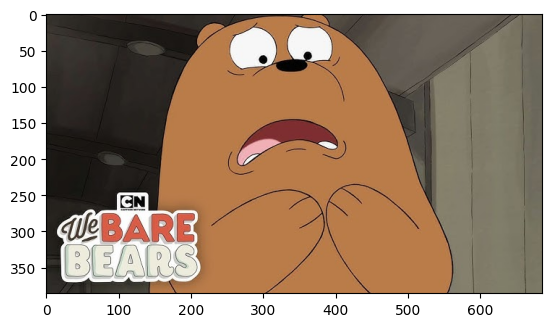

In [34]:
readable_prediction("data/doggy_door_images/bear.jpg")

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [36]:
from tensorflow.keras.preprocessing import image as image_utils
import numpy as np

def load_and_preprocess_image(image_path):
    # misalnya model butuh grayscale 28x28 px
    img = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    img_array = image_utils.img_to_array(img)
    img_array = img_array.reshape(1,28,28,1)
    img_array = img_array / 255.0  # normalisasi ke 0-1
    return img_array


In [37]:
import numpy as np

alphabet = "abcdefghiklmnopqrstuvwxy"  # tanpa j dan z
dictionary = {i: alphabet[i] for i in range(len(alphabet))}

def predict_letter(image_path):
    show_image(image_path)
    processed_image = load_and_preprocess_image(image_path)
    prediction = model.predict(processed_image)
    predicted_index = np.argmax(prediction)
    predicted_letter = dictionary[predicted_index]
    print(f"Prediksi model: {predicted_letter}")
    return predicted_letter


In [40]:
import os
print(os.listdir('data/doggy_door_images'))


['bear.jpg', 'download.jpeg']


In [41]:
from google.colab import files

uploaded = files.upload()  # Akan muncul tombol untuk pilih file dari komputer kamu


Saving cat.jpg to cat.jpg


In [42]:
import os

os.makedirs('data/doggy_door_images', exist_ok=True)
os.rename('cat.jpg', 'data/doggy_door_images/cat.jpg')


In [43]:
print(os.listdir('data/doggy_door_images'))


['cat.jpg', 'bear.jpg', 'download.jpeg']


In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
import numpy as np

# Fungsi tampilkan gambar
def show_image(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

# Fungsi load dan preprocess gambar sesuai model
def load_and_preprocess_image(image_path):
    img = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    img_array = image_utils.img_to_array(img)
    img_array = img_array.reshape(1,28,28,1)
    img_array = img_array / 255.0
    return img_array

# Mapping label model
alphabet = "abcdefghiklmnopqrstuvwxy"
dictionary = {i: alphabet[i] for i in range(len(alphabet))}

# Fungsi prediksi dan tampilkan hasil
def predict_letter(image_path):
    show_image(image_path)
    processed_image = load_and_preprocess_image(image_path)
    prediction = model.predict(processed_image)
    predicted_index = np.argmax(prediction)
    predicted_letter = dictionary[predicted_index]
    print(f"Prediksi model: {predicted_letter}")
    return predicted_letter


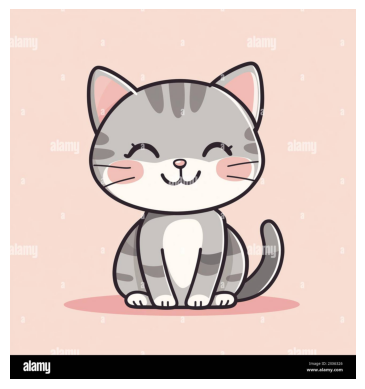

ValueError: Input 0 of layer "vgg16" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(1, 28, 28)

In [45]:
predict_letter('data/doggy_door_images/cat.jpg')


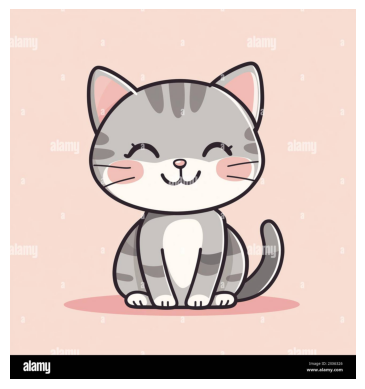

ValueError: Input 0 of layer "vgg16" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(1, 28, 28)

In [46]:
readable_prediction("data/doggy_door_images/cat.jpg")


In [47]:
import numpy as np

def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    preds = model.predict(image)
    if 151 <= np.argmax(preds) <= 268:
        print("Doggy come on in!")
    elif 281 <= np.argmax(preds) <= 285:
        print("Kitty stay inside!")
    else:
        print("You're not a dog! Stay outside!")


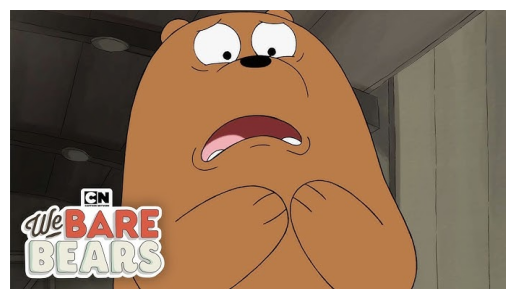

ValueError: Input 0 of layer "vgg16" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(1, 28, 28)

In [49]:
doggy_door("data/doggy_door_images/bear.jpg")

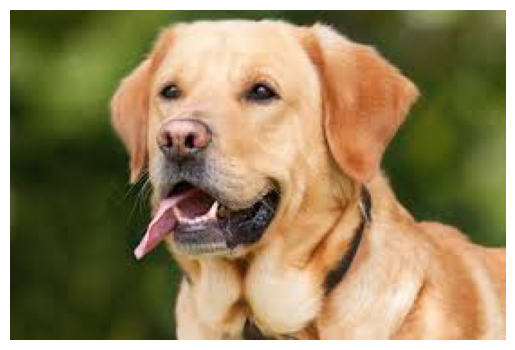

ValueError: Input 0 of layer "vgg16" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(1, 28, 28)

In [51]:
doggy_door("data/doggy_door_images/download.jpeg")

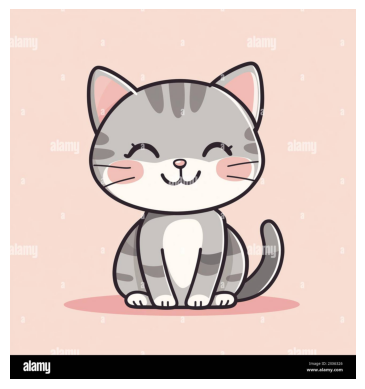

ValueError: Input 0 of layer "vgg16" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(1, 28, 28)

In [52]:
doggy_door("data/doggy_door_images/cat.jpg")

In [53]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}